# SIFT (Scale-Invariant Feature Transform)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

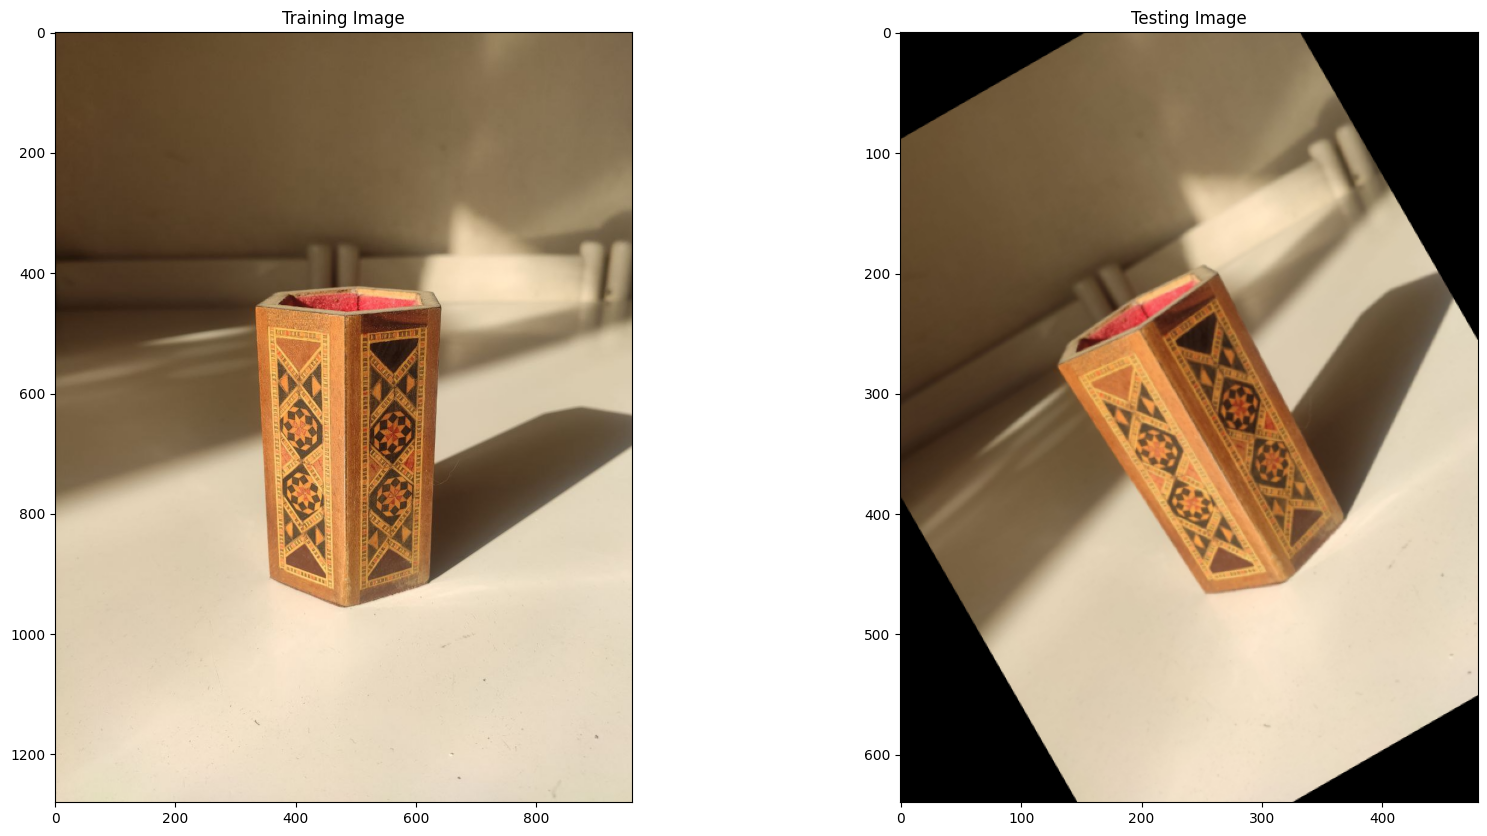

In [3]:
image1 = cv2.imread('object_1.jpg')
image2 = cv2.imread('test_image_3.jpg')

training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
testing_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
testing_gray = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)

test_image = cv2.pyrDown(training_image)
# test_image = cv2.pyrDown(testing_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))
test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

## Detect keypoints and Create Descriptor

Number of Keypoints Detected In The Training Image:  2164
Number of Keypoints Detected In The Test Image:  714


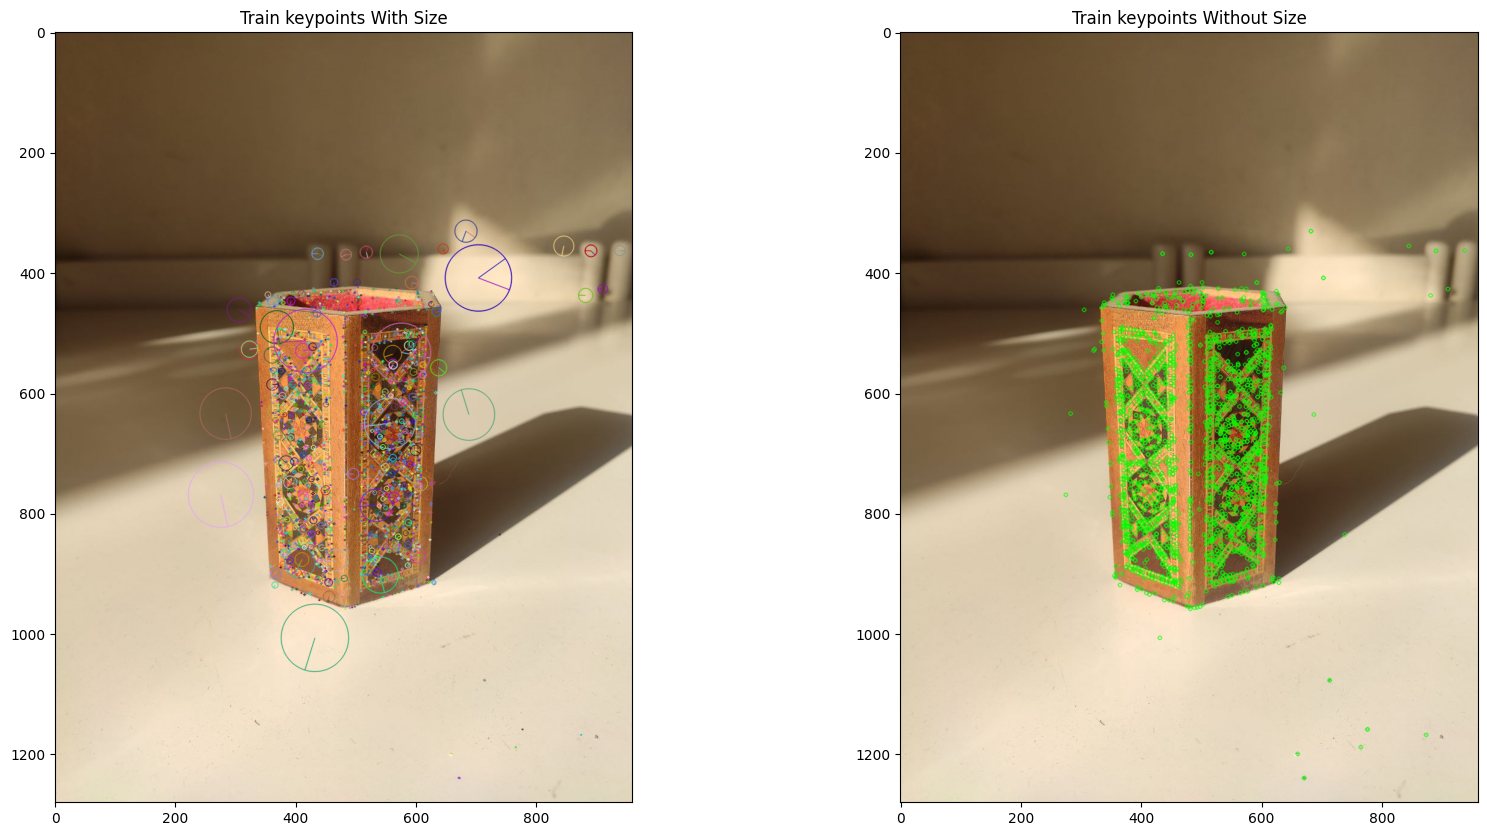

In [4]:
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))
print("Number of Keypoints Detected In The Test Image: ", len(test_keypoints))

## Matching Keypoints

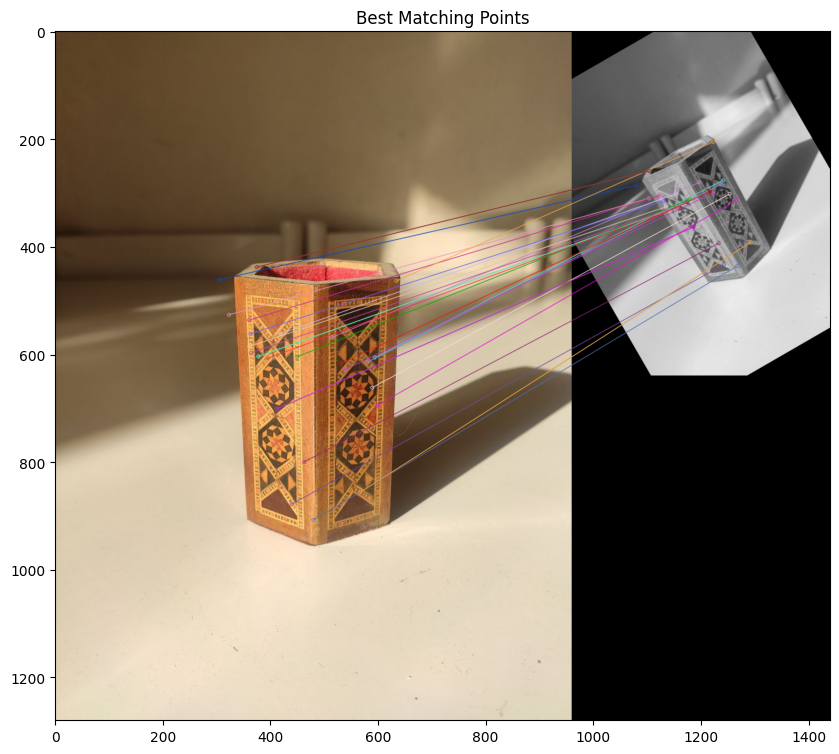


Number of Matching Keypoints Between The Training and Query Images:  2164


In [5]:

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

matches = bf.match(train_descriptor, test_descriptor)
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches[:30], test_gray, flags = 2)

plt.rcParams['figure.figsize'] = [10.0, 10.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

# Brute-Force Matching with ORB Descriptors

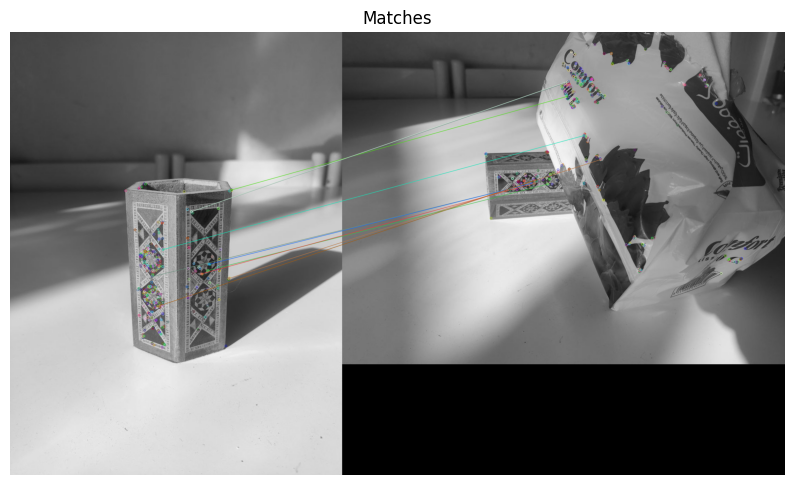

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Test Image:  500


In [6]:

reference_image = cv2.imread('object_1.jpg', cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('test_image_2.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(reference_image, None)
keypoints2, descriptors2 = orb.detectAndCompute(target_image, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

matched_image = cv2.drawMatches(
    reference_image, keypoints1, target_image, keypoints2, matches[:10], outImg=None
)

plt.imshow(matched_image)
plt.axis('off')
plt.title('Matches')
plt.show()

print("Number of Keypoints Detected In The Training Image: ", len(keypoints1))
print("Number of Keypoints Detected In The Test Image: ", len(keypoints2))

# FLANN based Matcher


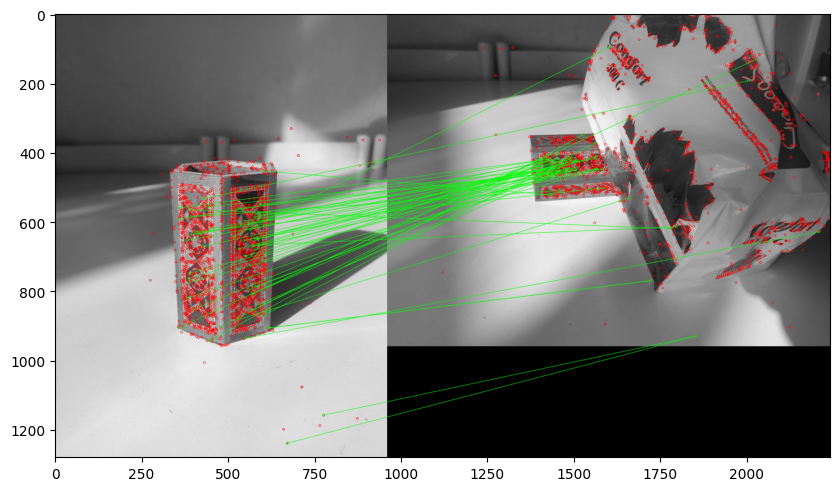

Number of Keypoints Detected In The Training Image:  2164
Number of Keypoints Detected In The Test Image:  1862


In [7]:

img1 = cv2.imread('object_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('test_image_2.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

print("Number of Keypoints Detected In The Training Image: ", len(kp1))
print("Number of Keypoints Detected In The Test Image: ", len(kp2))

# Brute-Force Matching with SIFT Descriptors and Ratio Test


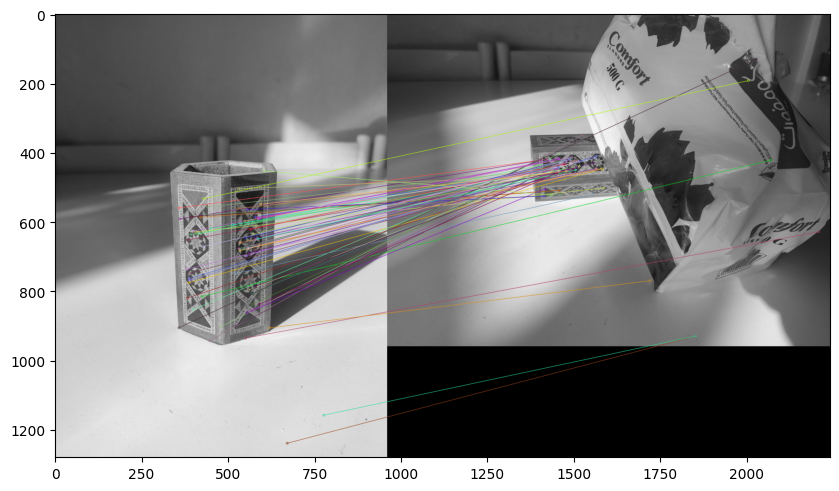

(<matplotlib.image.AxesImage at 0x135d7c98700>, None)

In [8]:
img1 = cv2.imread('object_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('test_image_2.jpg', cv2.IMREAD_GRAYSCALE)


sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

Using TM_CCOEFF for template matching...


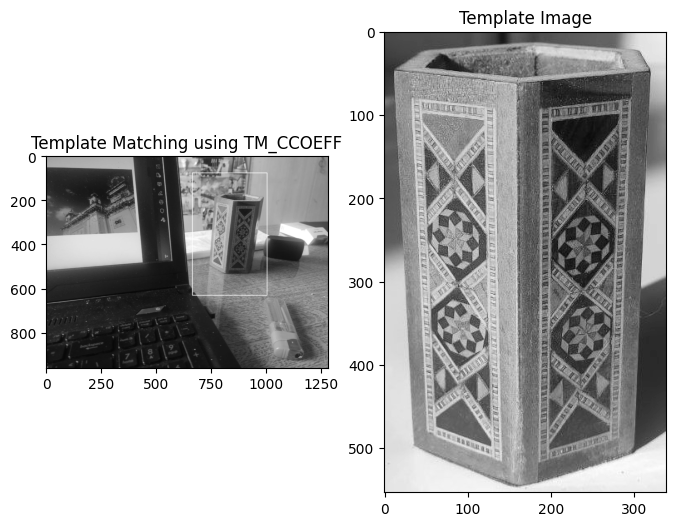

Using TM_CCOEFF_NORMED for template matching...


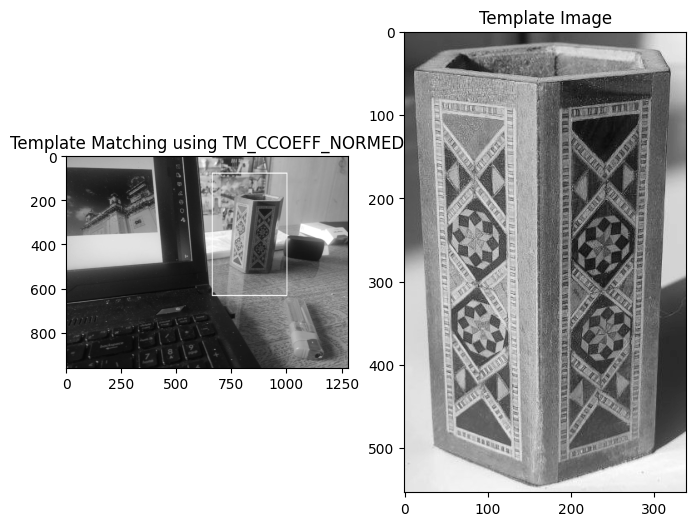

Using TM_CCORR for template matching...


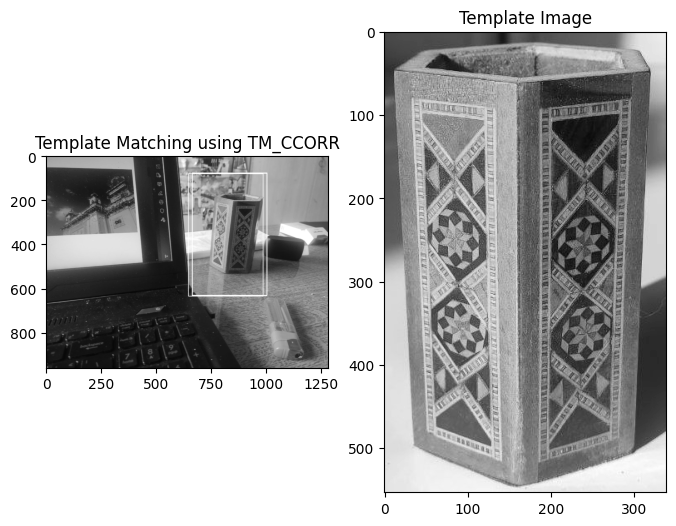

Using TM_CCORR_NORMED for template matching...


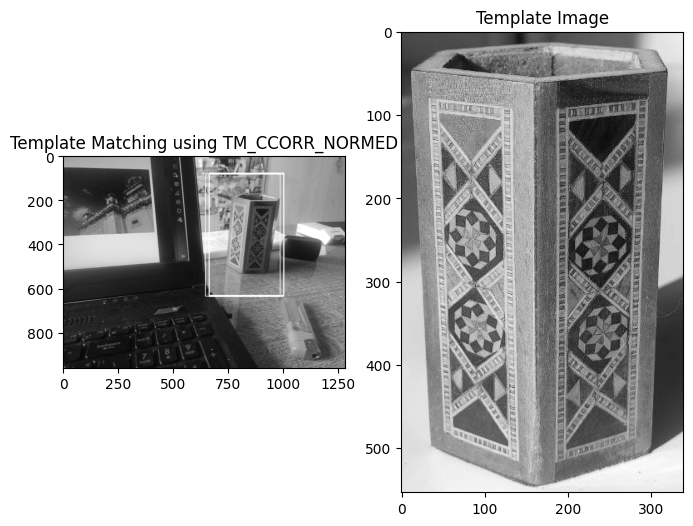

Using TM_SQDIFF for template matching...


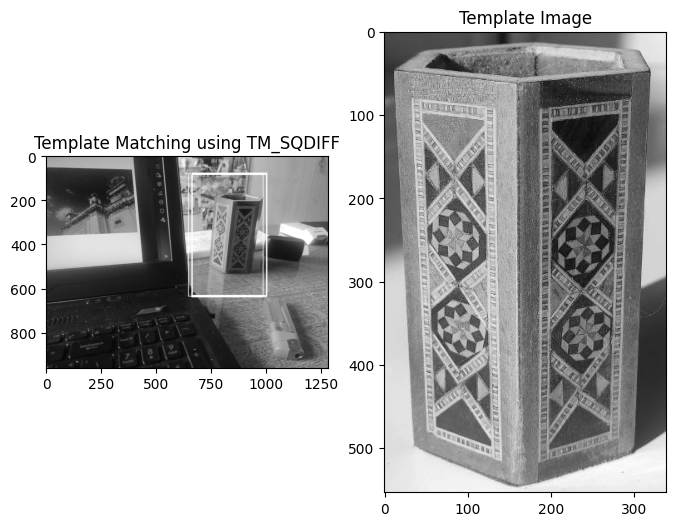

Using TM_SQDIFF_NORMED for template matching...


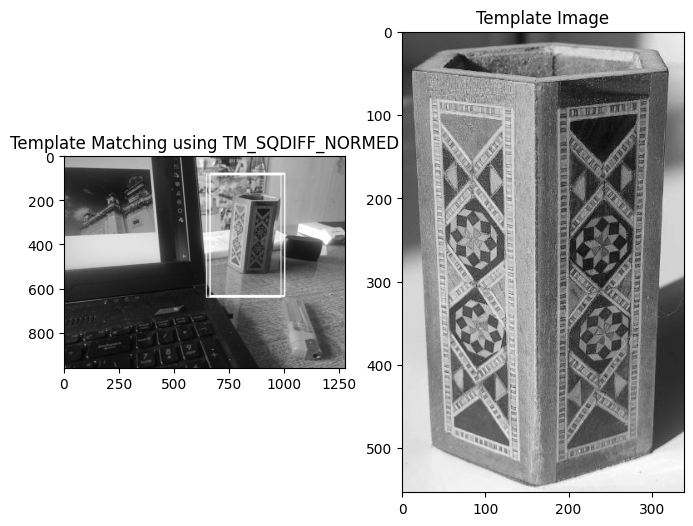

In [9]:
target_image = cv2.imread('test_image.jpg', cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread('object_1_template.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints_template, descriptors_template = sift.detectAndCompute(template_image, None)
keypoints_target, descriptors_target = sift.detectAndCompute(target_image, None)

methods = [
    ('TM_CCOEFF', cv2.TM_CCOEFF),
    ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED),
    ('TM_CCORR', cv2.TM_CCORR),
    ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
    ('TM_SQDIFF', cv2.TM_SQDIFF),
    ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
]

for method_name, method in methods:
    print(f"Using {method_name} for template matching...")

    result = cv2.matchTemplate(target_image, template_image, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        match_loc = min_loc
    else:
        match_loc = max_loc

    h, w = template_image.shape
    top_left = match_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(target_image, top_left, bottom_right, 255, 2)

    plt.figure(figsize=(8, 6))
    plt.subplot(121)
    plt.imshow(target_image, cmap='gray')
    plt.title(f'Template Matching using {method_name}')

    plt.subplot(122)
    plt.imshow(template_image, cmap='gray')
    plt.title('Template Image')

    plt.show()


Using TM_CCOEFF for template matching...


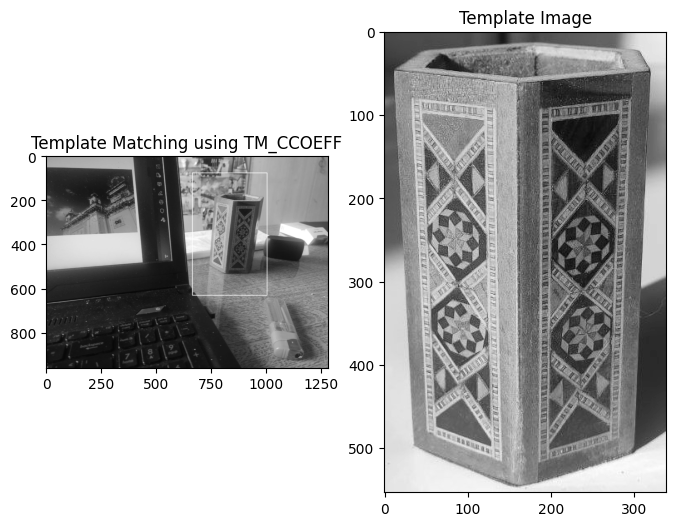

Using TM_CCOEFF_NORMED for template matching...


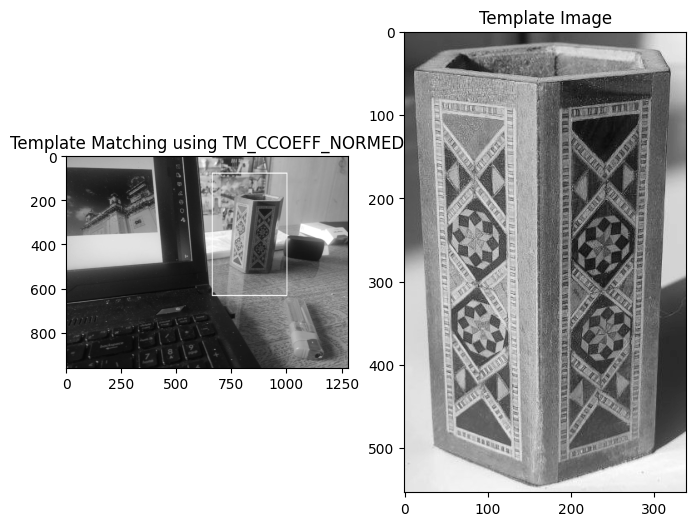

Using TM_CCORR for template matching...


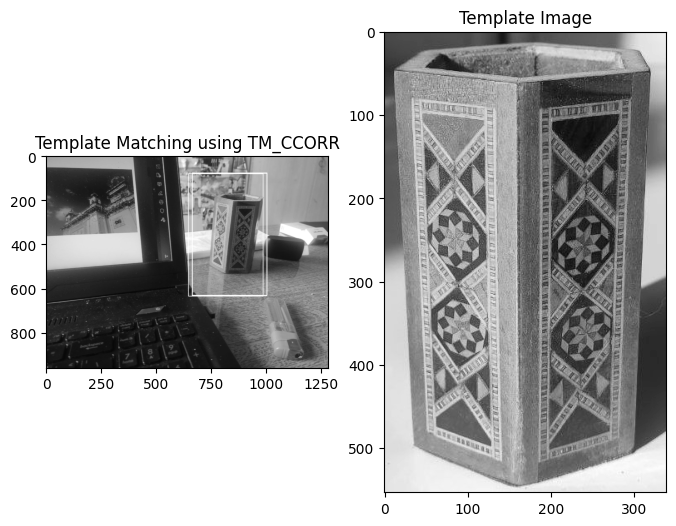

Using TM_CCORR_NORMED for template matching...


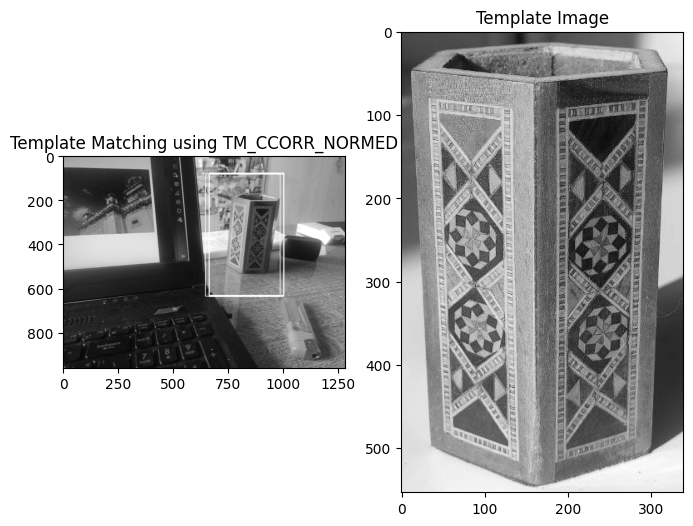

Using TM_SQDIFF for template matching...


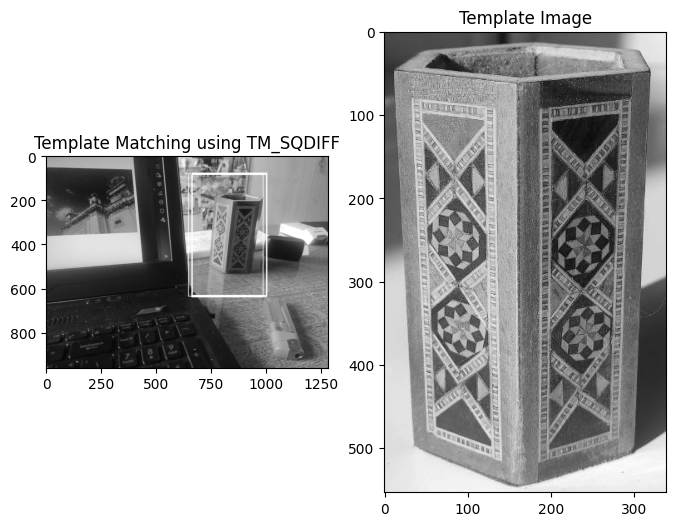

Using TM_SQDIFF_NORMED for template matching...


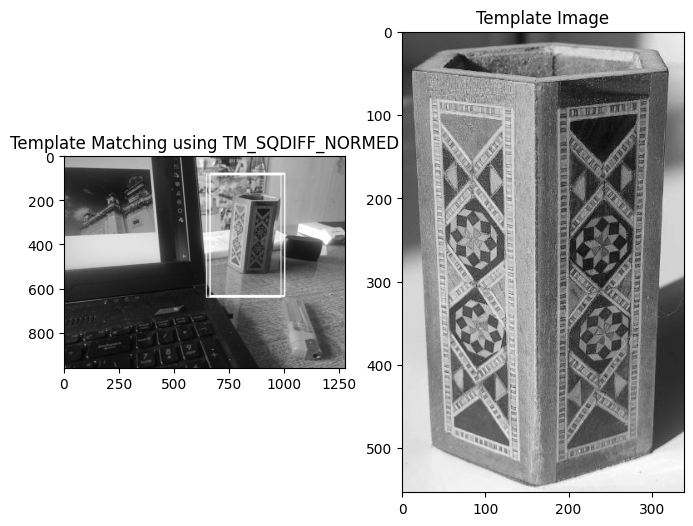

In [10]:

target_image = cv2.imread('test_image.jpg', cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread('object_1_template.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

keypoints_template, descriptors_template = orb.detectAndCompute(template_image, None)
keypoints_target, descriptors_target = orb.detectAndCompute(target_image, None)

methods = [
    ('TM_CCOEFF', cv2.TM_CCOEFF),
    ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED),
    ('TM_CCORR', cv2.TM_CCORR),
    ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
    ('TM_SQDIFF', cv2.TM_SQDIFF),
    ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
]

for method_name, method in methods:
    print(f"Using {method_name} for template matching...")

    result = cv2.matchTemplate(target_image, template_image, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        match_loc = min_loc
    else:
        match_loc = max_loc

    h, w = template_image.shape
    top_left = match_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(target_image, top_left, bottom_right, 255, 2)

    plt.figure(figsize=(8, 6))
    plt.subplot(121)
    plt.imshow(target_image, cmap='gray')
    plt.title(f'Template Matching using {method_name}')

    plt.subplot(122)
    plt.imshow(template_image, cmap='gray')
    plt.title('Template Image')

    plt.show()


# BRISK feature detection with template matching

(665, 77)


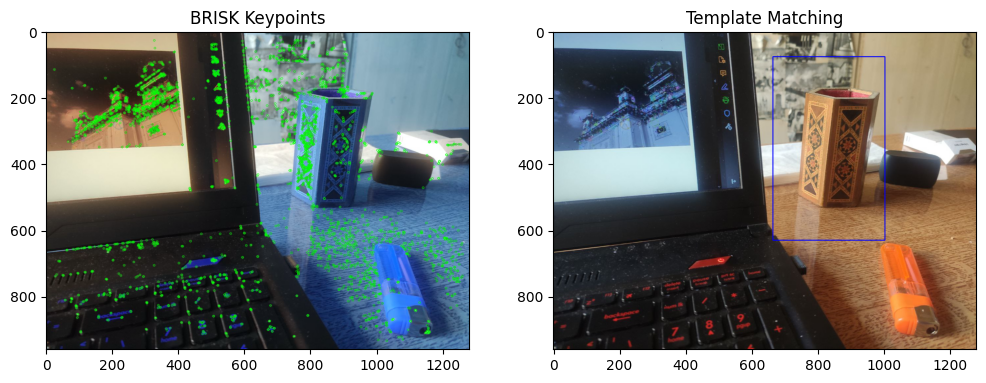

In [11]:

image = cv2.imread('test_image.jpg')
template = cv2.imread('object_1_template.jpg', cv2.IMREAD_GRAYSCALE)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

brisk = cv2.BRISK_create()

keypoints, descriptors = brisk.detectAndCompute(gray, None)

keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(0,255,0), flags=0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print(max_loc)
top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
cv2.rectangle(image, top_left, bottom_right, (255, 0, 0), 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(keypoint_image)
plt.title('BRISK Keypoints')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Template Matching')

plt.show()
